In [1]:
import pandas as pd
from google.colab import drive #memanggil package import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
path = '/content/drive/MyDrive/CSV/regresi5ed spreadsheet - Sheet4.csv'


df = pd.read_csv(path)

df.describe()

,volume,omzet
count,20.000000,2.000000e+01
mean,2234.700000,5.003525e+07
std,1913.483489,3.993193e+07
min,366.000000,5.140000e+06
25%,1120.250000,1.917000e+07
50%,1212.500000,3.744500e+07
75%,3031.750000,7.094125e+07
max,6720.000000,1.442800e+08


In [4]:
df

,lokasi,jenis,volume,satuan,omzet
0,Pasar Bunga Rawabelong,Ros Malang,3235,Ikat,144280000
1,Pasar Bunga Rawabelong,Hebras/Gerbera,1103,Ikat,66990000
2,Pasar Bunga Rawabelong,Pikok,4980,Ikat,82795000
3,Pasar Bunga Rawabelong,Aster (Cipanas),1196,Ikat,19875000
4,Pasar Bunga Rawabelong,Aster (PT),6720,Ikat,111440000
5,Pasar Bunga Rawabelong,Krisan Std (PT),2964,Ikat,64170000
6,Pasar Bunga Rawabelong,Gerbera (PT),1606,Ikat,32120000
7,Pasar Bunga Rawabelong,Carnation,1247,Ikat,43225000
8,Pasar Bunga Rawabelong,Snap Dragon,1089,Ikat,27225000
9,Pasar Bunga Rawabelong,Hortensia,1198,Ikat,29950000


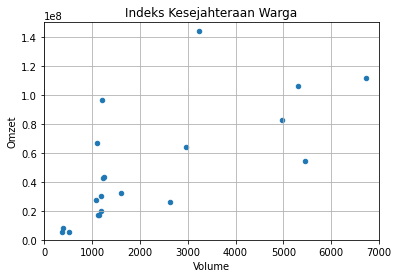

In [6]:
import matplotlib.pyplot as plt

df.plot(kind='scatter', x='volume', y='omzet')

plt.title('Indeks Kesejahteraan Warga')
plt.xlabel('Volume')
plt.ylabel('Omzet')
plt.xlim(0, 7000)
plt.ylim(0, 150080000)
plt.grid(True)
plt.show()

In [7]:
import numpy as np
x = np.array(df['volume'])
y = np.array(df['omzet'])

print(f'x : {x}')
print(f'y : {y}')

x : [3235 1103 4980 1196 6720 2964 1606 1247 1089 1198 1203 5443  514 5314
 1222 2628  403 1137  366 1126]
y : [144280000  66990000  82795000  19875000 111440000  64170000  32120000
  43225000  27225000  29950000  96240000  54430000   5140000 106280000
  42770000  26280000   8060000  17055000   5490000  16890000]


In [8]:
x = x.reshape(-1, 1)
x.shape

(20, 1)

In [9]:
x

array([[3235],
       [1103],
       [4980],
       [1196],
       [6720],
       [2964],
       [1606],
       [1247],
       [1089],
       [1198],
       [1203],
       [5443],
       [ 514],
       [5314],
       [1222],
       [2628],
       [ 403],
       [1137],
       [ 366],
       [1126]])

In [10]:
from sklearn.linear_model import LinearRegression #memanggil model regresi linear

model = LinearRegression() #variabel model bisa diganti
model.fit(x, y) #x feature , y target

LinearRegression()

In [12]:
x_vis = np.array([0, 7000]).reshape(-1, 1) #pembuatan garis merah dari x
y_vis = model.predict(x_vis) #model mesin lerning

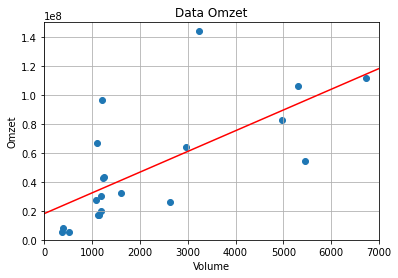

In [13]:
plt.scatter(x, y)
plt.plot(x_vis, y_vis, '-r')
plt.title('Data Omzet')
plt.xlabel('Volume')
plt.ylabel('Omzet')
plt.xlim(0, 7000)
plt.ylim(0, 150080000) # untuk membuat batas pada visualisasi y
plt.grid(True)
plt.show()

In [ ]:
print(f'intercept  :  {model.intercept_}')
print(f'slope : {model.coef_}')

intercept  :  -189791.23016498855
slope : [25999.29784246]


In [14]:
total_omzet = np.array([64170000, 64170000, 96240000, 17055000, 82795000]).reshape(-1, 1)
total_omzet

array([[64170000],
       [64170000],
       [96240000],
       [17055000],
       [82795000]])

In [15]:
prediksi_indeks = model.predict(total_omzet)
prediksi_indeks

array([9.17817426e+11, 9.17817426e+11, 1.37650256e+12, 2.43949318e+11,
       1.18420379e+12])

In [16]:
for omzet, index in zip(total_omzet, prediksi_indeks):
  print(f'Omzet : {omzet} prediksi indeks : {index}')

Omzet : [64170000] prediksi indeks : 917817426045.1989
Omzet : [64170000] prediksi indeks : 917817426045.1989
Omzet : [96240000] prediksi indeks : 1376502563126.0444
Omzet : [17055000] prediksi indeks : 243949317733.25494
Omzet : [82795000] prediksi indeks : 1184203789566.5815
